In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import shap
import matplotlib.pyplot as plt
import xgboost


In [25]:
# Load your dataset (replace with your dataset)
df = pd.read_csv('new_synthesized_dataset.csv')

In [26]:
# Drop irrelevant columns
X = df.drop(columns=['dissatisfaction'])
y = df['dissatisfaction'].to_numpy() 

In [28]:
import seaborn as sns


/tmp/ipykernel_6264/2424245386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dissatisfaction', palette='viridis')


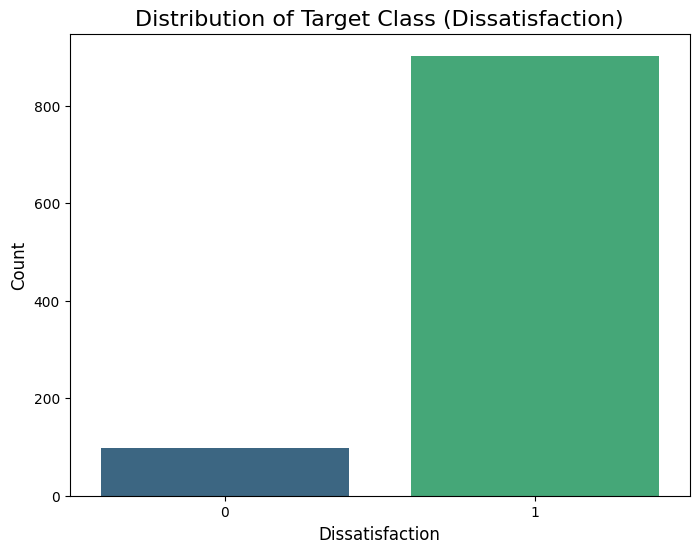

In [29]:
df = pd.read_csv('new_synthesized_dataset.csv')

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dissatisfaction', palette='viridis')

# Add title and labels
plt.title('Distribution of Target Class (Dissatisfaction)', fontsize=16)
plt.xlabel('Dissatisfaction', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()

/tmp/ipykernel_6264/38967029.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dissatisfaction_label', palette='viridis')


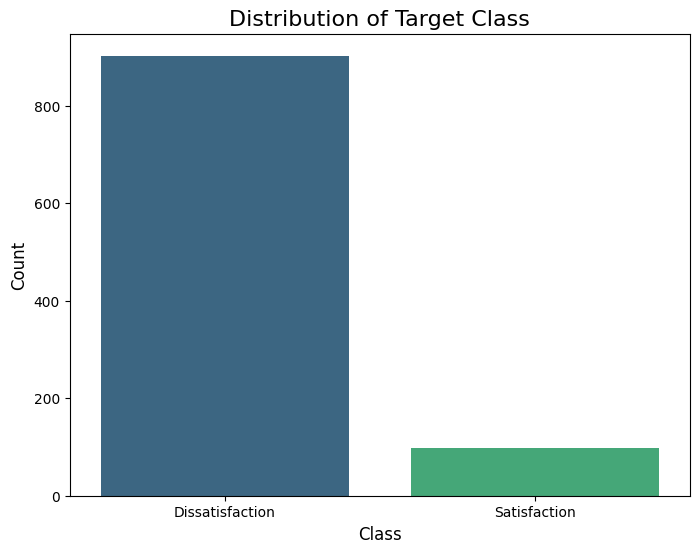

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your dataset)
df = pd.read_csv('new_synthesized_dataset.csv')

# Replace numeric labels with descriptive ones
df['dissatisfaction_label'] = df['dissatisfaction'].map({0: 'Satisfaction', 1: 'Dissatisfaction'})

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dissatisfaction_label', palette='viridis')

# Add title and labels
plt.title('Distribution of Target Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


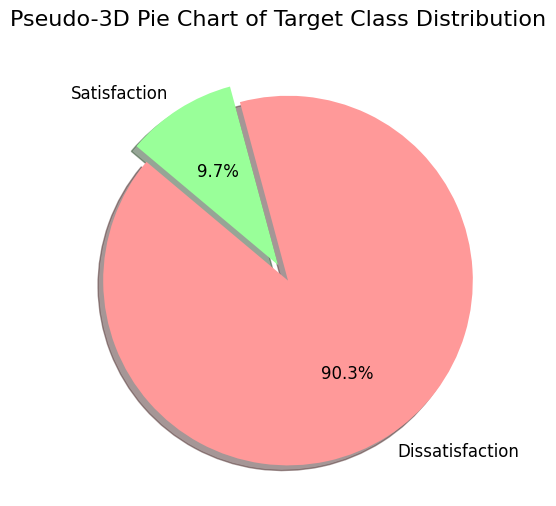

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your dataset)
df = pd.read_csv('new_synthesized_dataset.csv')

# Map numeric labels to descriptive ones
df['dissatisfaction_label'] = df['dissatisfaction'].map({0: 'Satisfaction', 1: 'Dissatisfaction'})

# Calculate the counts for each class
class_counts = df['dissatisfaction_label'].value_counts()

# Define labels, sizes, and pastel colors
labels = class_counts.index
sizes = class_counts.values
colors = ['#ff9999', '#99ff99']  # Pastel red and green
explode = (0.1, 0)  # Highlight the first slice (Satisfaction)

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    explode=explode,
    labels=labels,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    shadow=True
)

# Format the text
for text in texts + autotexts:
    text.set_fontsize(12)

# Set title
ax.set_title('Pseudo-3D Pie Chart of Target Class Distribution', fontsize=16)

# Show the plot
plt.show()


In [5]:
X.shape

(1000, 21)

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = xgboost.XGBClassifier().fit(X_train, y_train)


In [8]:
type(X_train)

pandas.core.frame.DataFrame

In [9]:
# compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

In [10]:
shap_values.shape

(800, 21)

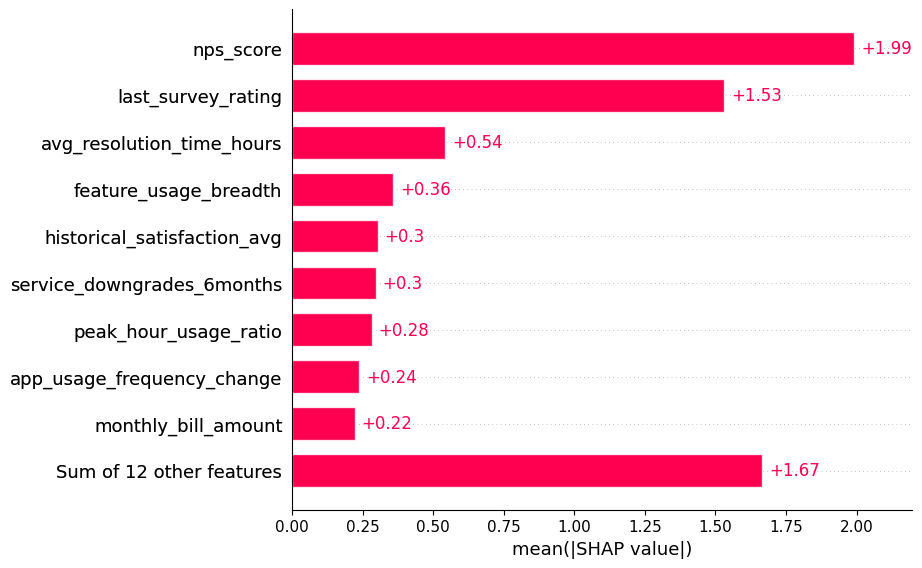

In [11]:
shap.plots.bar(shap_values)


In [12]:
type(shap_values[0])

shap._explanation.Explanation

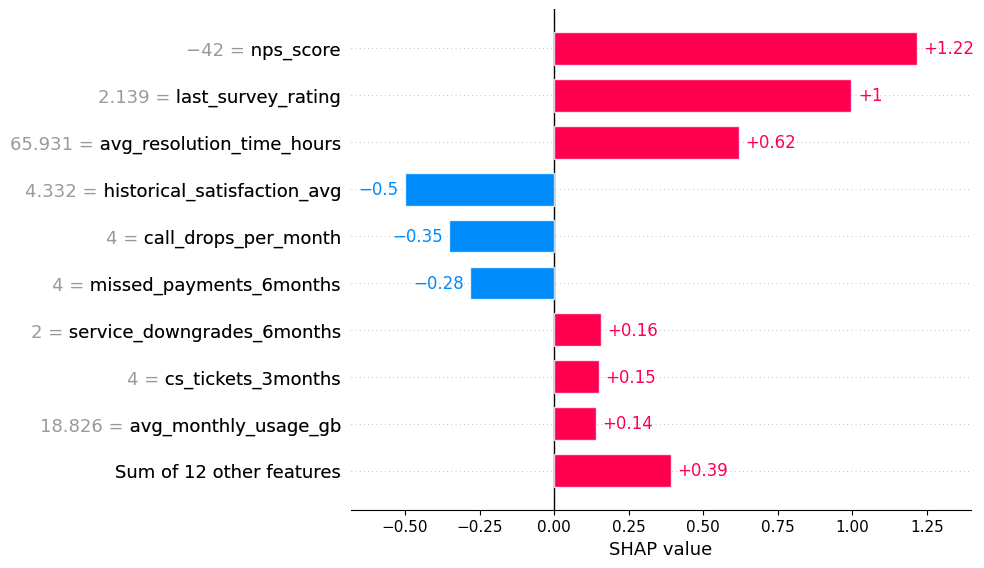

In [13]:
shap.plots.bar(shap_values[0])


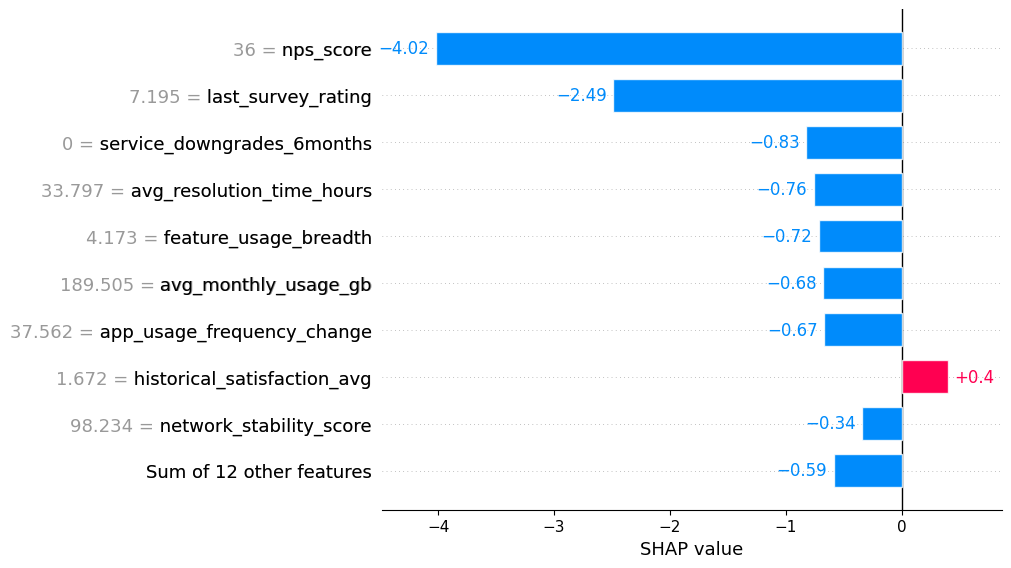

In [14]:
shap.plots.bar(shap_values[1])


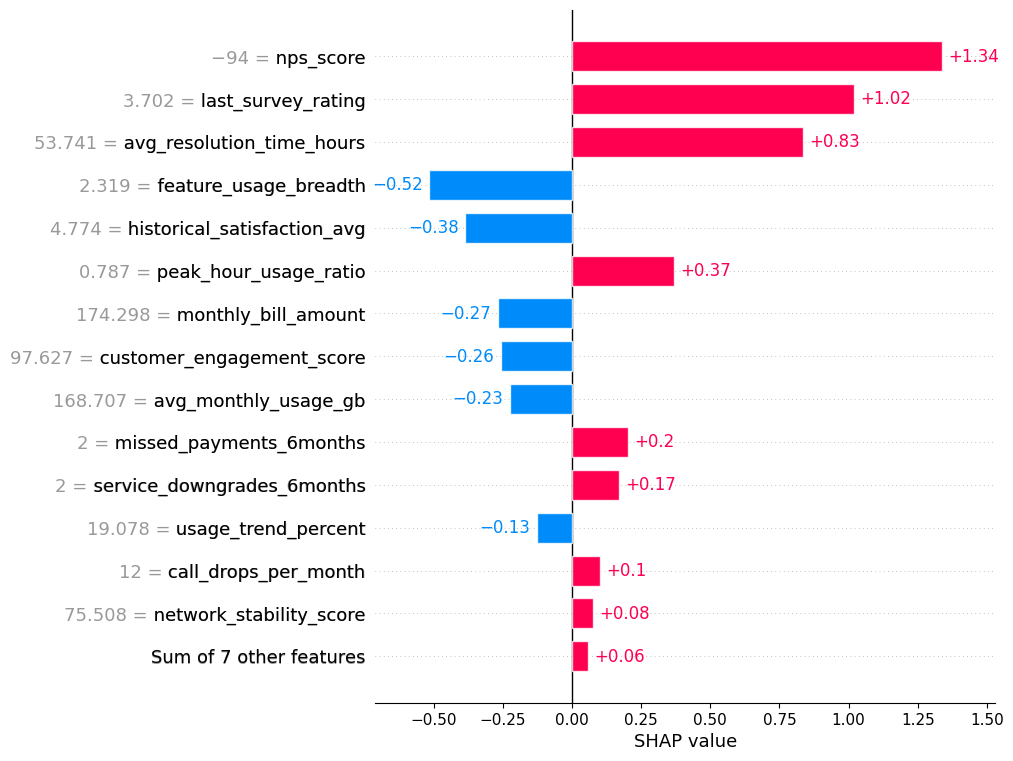

In [15]:
shap.plots.bar(shap_values[6],  max_display=15)


In [20]:
single_row = np.array([[5, 165.3485255, 19.56716933, 20.95173909, 0.666026334, 174.5734677, 
                        2, 77.81811719, 9, 8, 2, 54.69258488, 81.74314092, 16.16843562, 
                        5.099046802, 1, 1, 18, 7.489288762, 8.931040481, 1.596200972]])


In [21]:
dissatisfaction_pred = model.predict(single_row)
dissatisfaction_pred

array([1])

In [22]:
shap_values_single_row = explainer(single_row)


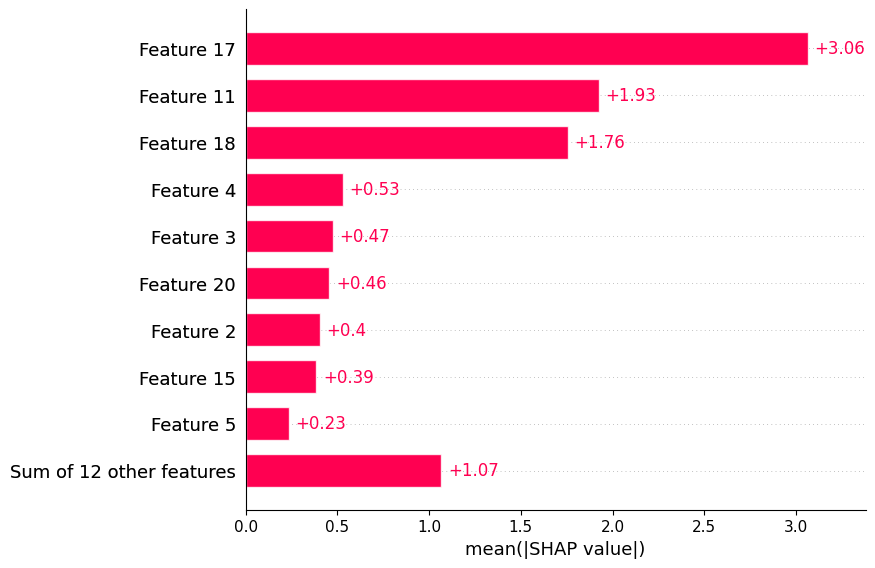

In [23]:
shap.plots.bar(shap_values)

In [61]:
type(shap_values_single_row)

shap._explanation.Explanation

In [62]:
print(shap_values_single_row)

.values =
array([[-1.46978601e-01,  1.50418785e-02, -4.03929142e-01,
         4.74197908e-01,  5.28624409e-01,  2.34055365e-01,
        -1.13130498e-01, -1.66189060e-01,  1.48745519e-01,
         8.95923392e-02,  1.35961855e-02,  1.92596139e+00,
        -2.04235655e-01, -5.26533329e-02, -9.99250853e-02,
         3.86178822e-01,  1.22989536e-03, -3.06437848e+00,
        -1.75583960e+00, -1.46028142e-02,  4.55880434e-01]])

.base_values =
array([5.78089038])

.data =
array([[  5.        , 165.3485255 ,  19.56716933,  20.95173909,
          0.66602633, 174.5734677 ,   2.        ,  77.81811719,
          9.        ,   8.        ,   2.        ,  54.69258488,
         81.74314092,  16.16843562,   5.0990468 ,   1.        ,
          1.        ,  18.        ,   7.48928876,   8.93104048,
          1.59620097]])


In [58]:
# Identify the features that contribute positively (features with positive SHAP values for dissatisfaction)
positive_contributors = []
positive_values = []

for i in range(len(shap_values_single_row[0].values)):
    if shap_values_single_row[0].values[i] > 0:
        positive_contributors.append(X.columns[i])
        positive_values.append(shap_values_single_row[0].values[i])


In [ ]:
def get_shap_analysis(customer_data):
    explainer = shap.Explainer(model, customer_data)
    shap_values = explainer(customer_data)

    positive_contributors = []
    positive_values = []
    
    for i in range(len(shap_values[0].values)):
        if shap_values[0].values[i] > 0:
            positive_contributors.append(X.columns[i])
            positive_values.append(shap_values_single_row[0].values[i])
    
    # Get the highest influencing feature
    feature_importance = pd.DataFrame({
        'feature': positive_contributors,
        'importance': positive_values
    })
    top_feature = feature_importance.nlargest(1, 'importance')['feature'].iloc[0]
    
    return top_feature

In [59]:
# Print the positive contributors and their corresponding SHAP values
for feature, value in zip(positive_contributors, positive_values):
    print(f"Feature: {feature}, SHAP value: {value}")

Feature: monthly_bill_amount, SHAP value: 0.015041878502815962
Feature: usage_trend_percent, SHAP value: 0.47419790816027674
Feature: peak_hour_usage_ratio, SHAP value: 0.5286244088062085
Feature: avg_monthly_usage_gb, SHAP value: 0.23405536476522684
Feature: call_drops_per_month, SHAP value: 0.14874551858985796
Feature: cs_tickets_3months, SHAP value: 0.08959233918227255
Feature: unresolved_tickets, SHAP value: 0.013596185464411974
Feature: avg_resolution_time_hours, SHAP value: 1.925961388675496
Feature: service_downgrades_6months, SHAP value: 0.38617882172577084
Feature: service_cancellation_attempts, SHAP value: 0.0012298953626304866
Feature: historical_satisfaction_avg, SHAP value: 0.45588043397758155


In [60]:
# Create a DataFrame to sort the features by their SHAP values
positive_contrib_df = pd.DataFrame({
    'Feature': positive_contributors,
    'SHAP Value': positive_values
})

# Sort by SHAP Value in descending order
sorted_positive_contrib_df = positive_contrib_df.sort_values(by='SHAP Value', ascending=False)

# Print the sorted positive contributors and their SHAP values
print(sorted_positive_contrib_df)

                          Feature  SHAP Value
7       avg_resolution_time_hours    1.925961
2           peak_hour_usage_ratio    0.528624
1             usage_trend_percent    0.474198
10    historical_satisfaction_avg    0.455880
8      service_downgrades_6months    0.386179
3            avg_monthly_usage_gb    0.234055
4            call_drops_per_month    0.148746
5              cs_tickets_3months    0.089592
0             monthly_bill_amount    0.015042
6              unresolved_tickets    0.013596
9   service_cancellation_attempts    0.001230
